# Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,precision_score,recall_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# The data

In [20]:
path = "Wholesale customers data.csv"
df = pd.read_csv(path)
df.shape

(440, 8)

# Preview the data

In [21]:
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Visualization

In [25]:
df.drop(columns=['Channel', 'Region'], inplace=True)

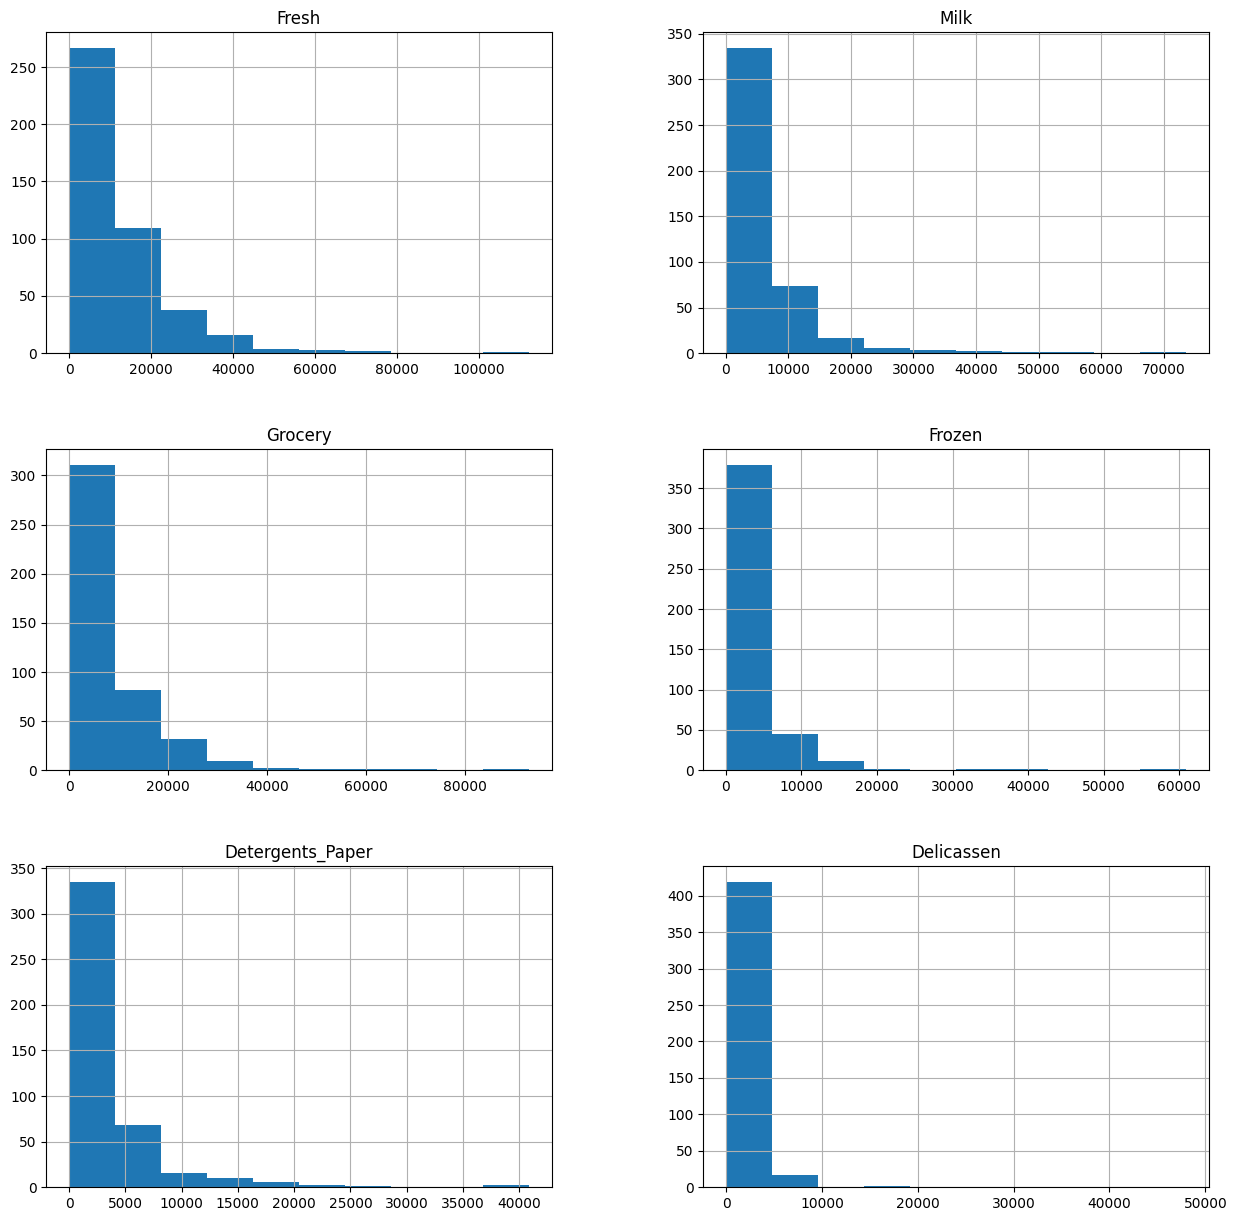

In [26]:
df.hist(figsize=(15,15))
plt.show()

<Axes: >

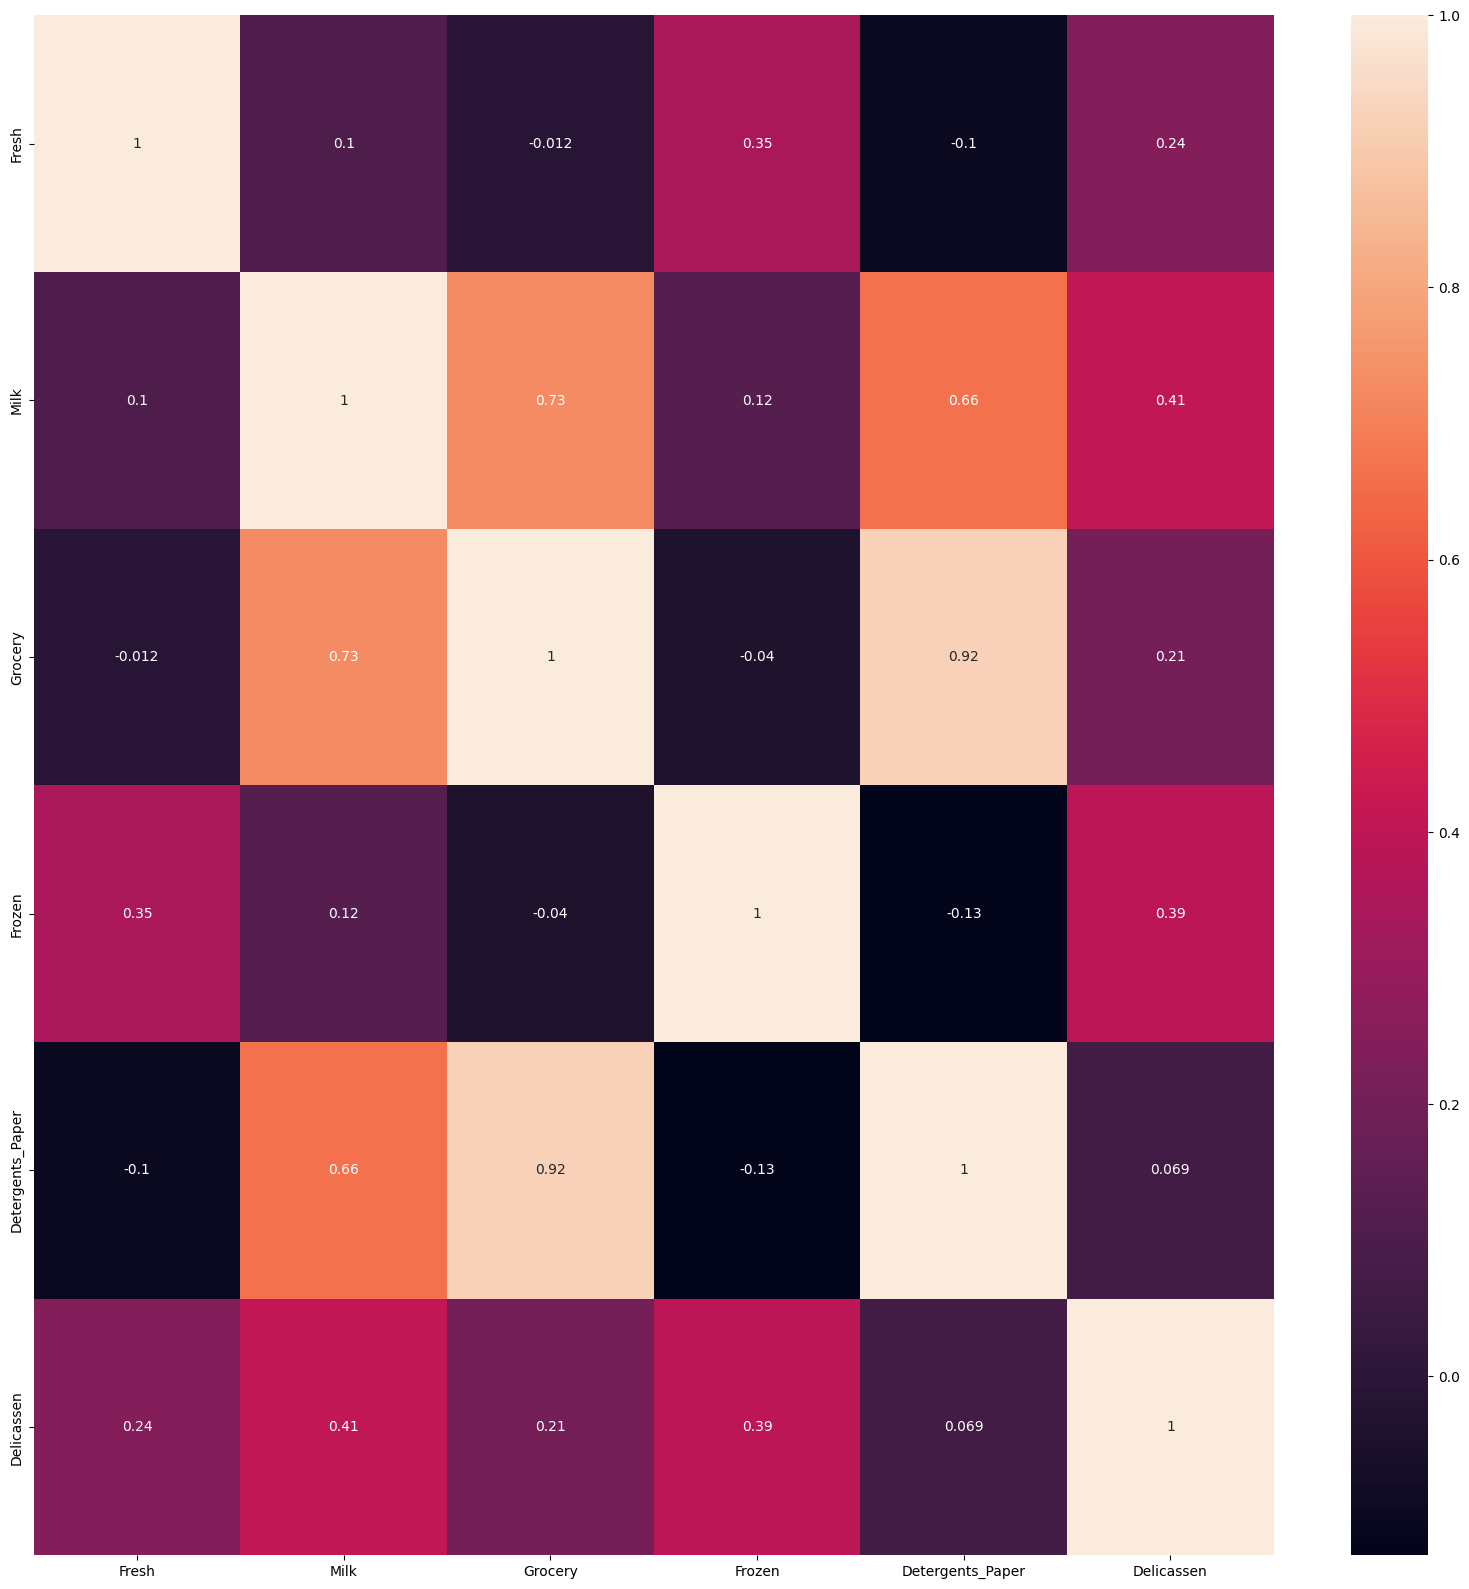

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns].corr(),annot=True)

# handling the data`

In [28]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# modeling

In [30]:
from sklearn.cluster import KMeans, AgglomerativeClustering
wcss = []

for i in range(1,15):
  Kmeans_model = KMeans(n_clusters=i, init="k-means++",random_state=0 )
  Kmeans_model.fit(df)
  wcss.append(Kmeans_model.inertia_)


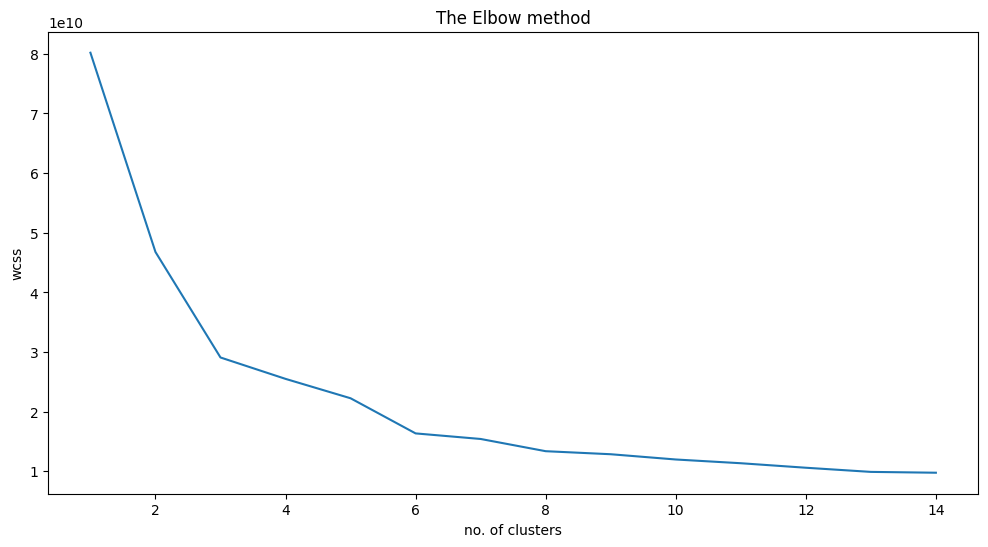

In [31]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss)
plt.title("The Elbow method")
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
Kmean_model = KMeans(n_clusters=3, random_state=0)

y_means = Kmean_model.fit_predict(df)

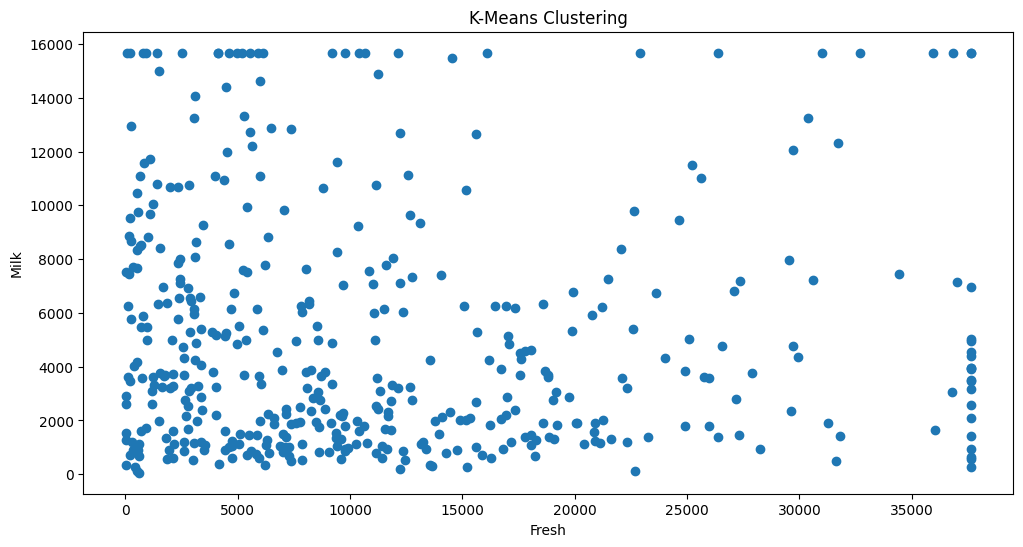

In [33]:
plt.figure(figsize=(12,6))

x_plot = df.iloc[:,0]
y_plot = df.iloc[:,1]
plt.scatter(x_plot,y_plot)
plt.title('K-Means Clustering')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [34]:
def log_transform_df(df, columns):
    """Applies log transformation to specified columns in a DataFrame."""
    for col in columns:
        df[col] = np.log1p(df[col])
    return df

numerical_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_log_transformed = log_transform_df(df.copy(), numerical_cols)

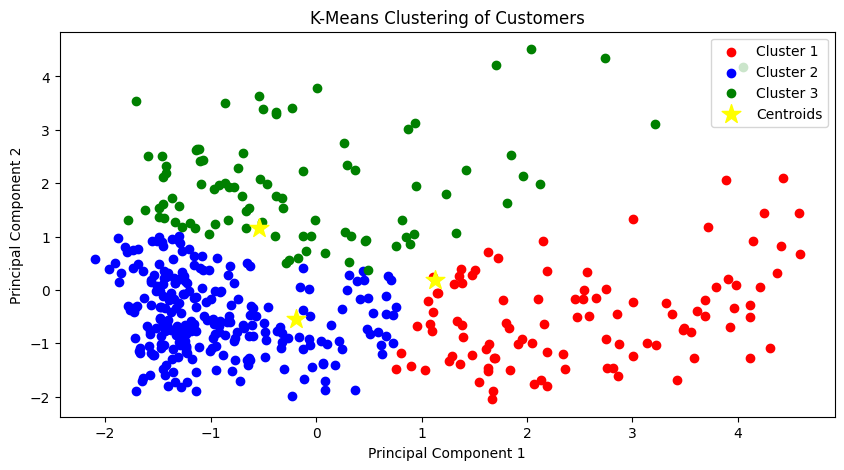

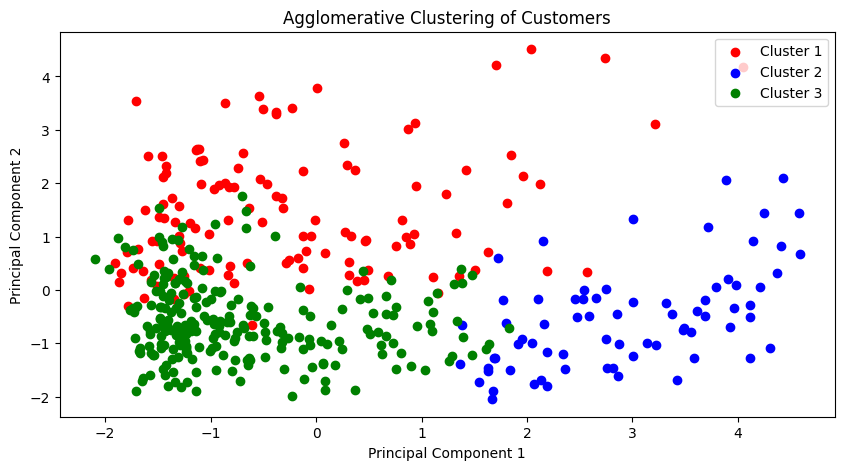

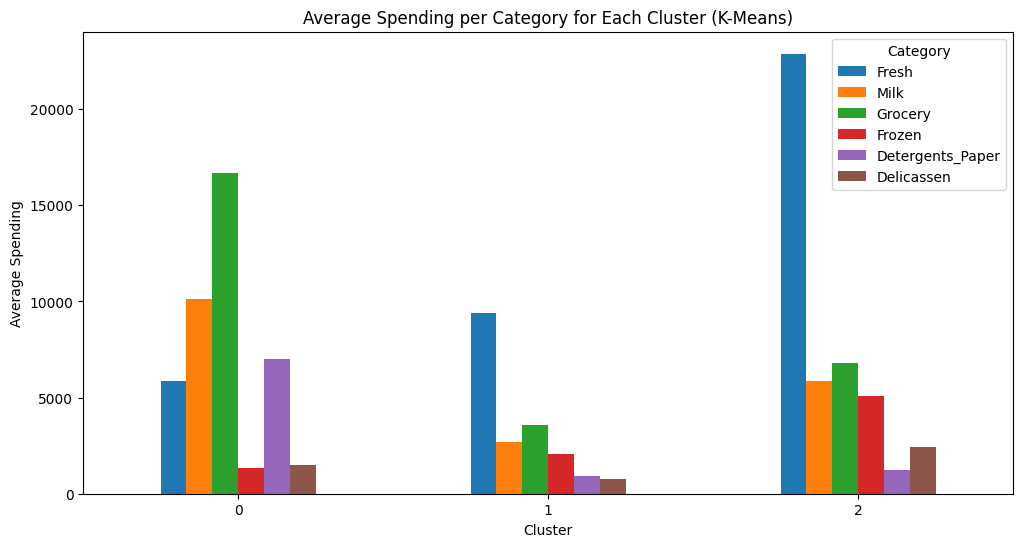

In [35]:
from sklearn.decomposition import PCA
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# تطبيق K-Means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_means = kmeans.fit_predict(X_scaled)

# تطبيق Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
y_agg = agg_clustering.fit_predict(X_scaled)

# رسم نتائج K-Means
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[y_means == 0, 0], X_pca[y_means == 0, 1], c='red', label='Cluster 1')
plt.scatter(X_pca[y_means == 1, 0], X_pca[y_means == 1, 1], c='blue', label='Cluster 2')
plt.scatter(X_pca[y_means == 2, 0], X_pca[y_means == 2, 1], c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids', marker='*')
plt.title("K-Means Clustering of Customers")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# رسم نتائج Agglomerative Clustering
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[y_agg == 0, 0], X_pca[y_agg == 0, 1], c='red', label='Cluster 1')
plt.scatter(X_pca[y_agg == 1, 0], X_pca[y_agg == 1, 1], c='blue', label='Cluster 2')
plt.scatter(X_pca[y_agg == 2, 0], X_pca[y_agg == 2, 1], c='green', label='Cluster 3')
plt.title("Agglomerative Clustering of Customers")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# عرض متوسط الإنفاق لكل فئة في كل مجموعة (K-Means)
df['Cluster'] = y_means
cluster_means = df.groupby('Cluster')[features].mean()
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Average Spending per Category for Each Cluster (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.show()

In [38]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler_model.pkl')









['scaler_model.pkl']